In [1]:
# hw1

'''
Исходный код к уроку 1.
Построение двухслойной нейронной сети для классификации цветков ириса
'''
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split

Шаг 1. Определение функций, которые понадобятся для обучения

In [2]:
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

In [3]:
# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))
    
    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

In [4]:
# функция активации Leaky ReLU и ее производная

def leaky_relu(x):
    return x * ((x > 0) + 0.01)

def leaky_relu_deriv(x):
    return 1 * ((x > 0) + 0.01)

    
    
# вычисление сигмоид функции

def sigmoid(x):
     return 1 / (1 + np.exp(-x))
    
    
# вычисление производной от сигмоид функции
def sigmoid_deriv(x):
        return sigmoid(x) * (1 - sigmoid(x))

In [5]:
# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)


Шаг 2. Подготовка тренировочных данных

In [6]:
# получения данных из csv файла
iris_data = pd.read_csv("Iris.csv")
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
## репрезентация данных в виде графиков
#g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
#plt.show()

In [8]:
# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

In [9]:
# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

In [10]:
# формирование выходных данных (результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)

In [11]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

Шаг 3. Обученние нейронной сети

In [12]:
import random
random.seed(197)

# присваивание случайных весов
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя - 4 входа, 3 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для 1го внутреннего слоя - 5 входов, 3 выхода
w2 = 2*np.random.random((3, 3)) - 1 # для 2го внутреннего слоя - 3 входа, 3 выхода

# скорость обучения (learning rate)
n = 0.003

# массив для ошибок
errors = []

max_iterations = 100000

# процесс обучения
for i in range(max_iterations):
    # прямое распространение(feed forward)
    layer0 = X_train
    
    layer1 = leaky_relu(np.dot(layer0, w0))
    layer2 = leaky_relu(np.dot(layer1, w1))
    layer3 = leaky_relu(np.dot(layer2, w2))
    
    layer3_error = y_train - layer3                         # ошибка для 3го слоя
    layer3_delta = layer3_error * leaky_relu_deriv(layer3)  # ошибка х активацию 3 слоя для овновления весов
    
    layer2_error = layer3_delta.dot(w2.T)                   # ошибка на 2ом слое = (ошибка х активацию 3слоя) х веса 3го
    layer2_delta = layer2_error * leaky_relu_deriv(layer2)  # ошибка х активацию 2 слоя для овновления весов
    
    layer1_error = layer2_delta.dot(w1.T)                   # ошибка на 1ом слое = (ошибка х активацию 2слоя) х веса 2го
    layer1_delta = layer1_error * sigmoid_deriv(layer1)     # ошибка х активацию 1 слоя для овновления весов
    
        
    w2 += layer2.T.dot(layer3_delta) * n   # обновление весов
    w1 += layer1.T.dot(layer2_delta) * n   
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer3_error))
    errors.append(error)
    accuracy = (1 - error) * 100

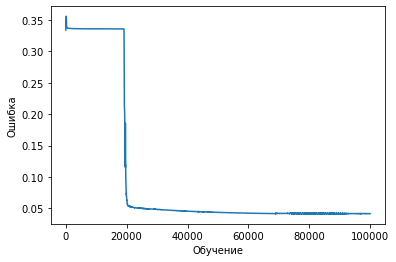

Точность нейронной сети 95.83%


In [13]:
# диаграмма точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

In [14]:
errors[-1]

0.041686591849861065

КАК УЛУЧШИТЬ МЕТРИКУ

Заменил функцию активации с сигмоиды на Leaky ReLU.

По результатам подобрал скорость и количество итераций. Получил 95.0 точности.

Не улучшил, на самом деле (в тренировочном примере 95.6).

Идем дальше. Добавил 3й слой. В итоге получил примерно те же значения accuracy. 

Здесь остановлюсь (и так чудо, что с этим 3 слоем что-то получилось).